# Tutorial 6 
# Artificial Neural Network

## Preprocess data for use in a neural network.

In [1]:
#!pip install tensorflow --user #==2.3.0

In [2]:
#!pip install keras==2.4

In [3]:
#Load library
from sklearn import preprocessing
import  numpy  as  np

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

#Create features
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

#Create a standardizer
scaler = preprocessing.StandardScaler()

#Convert features
features_standardized = scaler.fit_transform(features)

#Display features
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

## Designing a Neural Network
* We will create a two-layer neural network (when counting layers we don’t include the input layer because it does not have any parameters to learn) using Keras’ sequential model. 
* Each layer is “dense” (also called fully connected), meaning that all the units in the previous layer are connected to all the neurals in the next layer. 
* In the first hidden layer we set units=16, meaning that layer contains 16 units with ReLU activation functions: activation='relu'. 
* In Keras, the first hidden layer of any network has to include an input_shape parameter, which is the shape of feature data. For example, (10,) tells the first layer to expect each observation to have 10 feature values. 
* In second layer is the same as the first, without the need for the input_shape parameter. This network is designed for binary classification so the output layer contains only one unit with a sigmoid activation function, which constrains the output to between 0 and 1 (representing the probability an observation is class 1).

* Finally, before we can train our model, we need to tell Keras how we want our network to learn. We do this using the compile method, with our optimization algorithm (RMSProp), loss function (binary_crossentropy), and one or more performance metrics.

In [4]:
#Load library
from keras import models
from keras import layers

#Start creating neural network
network = models.Sequential()

# Added fully connected layer using ReLU as activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# Added fully connected layer using ReLU as activation function
network.add(layers.Dense(units=16, activation="relu"))

# Added fully connected layer that uses sigmoid function as activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

#Compile neural network
network . compile ( loss = "binary_crossentropy" , # cross entropy
                optimizer = "rmsprop" , # root mean square propagation method
                metrics = [ "accuracy" ]) # performance indicators は accuracy

* For each layer in the hidden and output layers we must define the number of units to include in the layer and the activation function. Overall, the more units we have in a layer, the more our network is able to learn complex patterns. However, more units might make our network overfit the training data in a way detrimental to the performance on the test data.

For hidden layers, a popular activation function is the rectified linear unit (ReLU):

f ( z ) = max ( 0 , z )

where z is the sum of the weighted inputs and bias. As we can see, if z is greater than 0, the activation function returns z; otherwise, the function returns 0. This simple activation function has a number of desirable properties (a discussion of which is beyond the scope of this book) and this has made it a popular choice in neural networks. We should be aware, however, that many dozens of activation functions exist.

* Second, we need to define the number of hidden layers to use in the network. More layers allow the network to learn more complex relationships, but with a computational cost.

* Third, we have to define the structure of the activation function (if any) of the output layer. The nature of the output function is often determined by the goal of the network. Here are some common output layer patterns:

Binary classification: One unit with a sigmoid activation function.

Multiclass classification: k units (where k is the number of target classes) and a softmax activation function.

Regression: One unit with no activation function.

* Fourth, we need to define a loss function (the function that measures how well a predicted value matches the true value); this is again often determined by the problem type:

Binary classification: Binary cross-entropy.
Multiclass classification: Categorical cross-entropy.
Regression: Mean square error.

* Fifth, we have to define an optimizer, which intuitively can be thought of as our strategy “walking around” the loss function to find the parameter values that produce the lowest error. Common choices for optimizers are stochastic gradient descent, stochastic gradient descent with momentum, root mean square propagation, and adaptive moment estimation (more information on these optimizers in “See Also”).

* Sixth, we can select one or more metrics to use to evaluate the performance, such as accuracy.

Keras offers two ways for creating neural networks. Keras’ sequential model creates neural networks by stacking together layers. An alternative method for creating neural networks is called the functional API, but that is more for researchers rather than practitioners.

## Training a Binary Classifier

In [5]:
# Load library
import  numpy  as  np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random number seed
np.random.seed(0)

# Specify the number of features you want to use
number_of_features = 1000

# Load movie criticism data and target vectors
# (data_train, target_train), (data_test, target_test) = imdb.load_data(num_words = number_of_features)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = number_of_features)

# One-hot encode movie criticism data and convert it to a feature matrix
tokenizer = Tokenizer(num_words = number_of_features)
X_train = tokenizer.sequences_to_matrix(X_train, mode = "binary")
X_test = tokenizer.sequences_to_matrix(X_test, mode = "binary")

# Start creating neural network
network = models.Sequential()

# Added fully connected layer using ReLU as activation function
network.add(layers.Dense(units = 16, activation = "relu", input_shape = (number_of_features,)))

# Added fully connected layer using ReLU as activation function
network.add(layers.Dense(units = 16, activation = "relu"))

# Added fully connected layer that uses sigmoid function as activation function
network.add(layers.Dense(units = 1, activation = "sigmoid"))

#Compile neural network
network.compile ( loss = "binary_crossentropy" , # cross entropy
                  optimizer = "rmsprop" ,        # root mean square propagation method
                  metrics = [ "accuracy" ])      # performance indicators は accuracy

#Training neural networks
History  =  network.fit ( X_train , # feature value
                          y_train , # target vector
                          epochs = 3 , # number of epochs
                          verbose = 1 , # Display status for each epoch
                          batch_size = 100 , # Number of observations per batch
                          validation_data = (X_test , y_test )) #test data

##########

# Display the shape of the feature matrix
X_train.shape

Epoch 1/3
250/250 [==============================] - 4s 12ms/step - loss: 0.4223 - accuracy: 0.8079 - val_loss: 0.3376 - val_accuracy: 0.8568
Epoch 2/3
250/250 [==============================] - 3s 13ms/step - loss: 0.3243 - accuracy: 0.8650 - val_loss: 0.3272 - val_accuracy: 0.8603
Epoch 3/3
250/250 [==============================] - 3s 13ms/step - loss: 0.3164 - accuracy: 0.8684 - val_loss: 0.3262 - val_accuracy: 0.8617


(25000, 1000)

In this above example, we train that neural network using real data. We use 50,000 movie reviews (25,000 as training data, 25,000 held out for testing), categorized as positive or negative. We convert the text of the reviews into 1,000 binary features indicating the presence of one of the 1,000 most frequent words. Put more simply, our neural networks will use 25,000 observations, each with 1,000 features, to predict if a movie review is positive or negative.

The epochs parameter defines how many epochs to use when training the data. verbose determines how much information is outputted during the training process, with 0 being no output, 1 outputting a progress bar, and 2 one log line per epoch. batch_size sets the number of observations to propagate through the network before updating the parameters.

Finally, we held out a test set of data to use to evaluate the model. These test features and test target vector can be arguments of validation_data, which will use them for evaluation. Alternatively, we could have used validation_split to define what fraction of the training data we want to hold out for evaluation.

# Testing accuracy
#### We can evaluate our model on the training set and testing set using the evaluate() function:

In [6]:
scores = network.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))

scores = network.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

782/782 [==============================] - 4s 5ms/step - loss: 0.2889 - accuracy: 0.8816
Training Accuracy: 88.16%

782/782 [==============================] - 6s 8ms/step - loss: 0.3262 - accuracy: 0.8617: 0s - loss: 0.3269 - ac - ETA: 0s - loss: 0.3268 - accura
Testing Accuracy: 86.17%



## Training a Multiclass Classifier

In [7]:
# Load libraries
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 5000

# data_train = X_train
# target_vector_train = y_vector_train
# data_test = X_test
# target_vector_test = X_test

# Load feature and target data
data = reuters.load_data(num_words = number_of_features)
(X_train, y_vector_train), (X_test, y_vector_test) = data

# Convert feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(X_train, mode = "binary")
features_test = tokenizer.sequences_to_matrix(X_test, mode = "binary")

# One-hot encode target vector to create a target matrix
target_train = to_categorical(y_vector_train)
target_test = to_categorical(y_vector_test)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units = 100,
                         activation = "relu",
                         input_shape = (number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units = 100, activation = "relu"))

# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units = 46, activation = "softmax"))

# Compile neural network
network.compile(loss = "categorical_crossentropy", # Cross-entropy
                optimizer = "rmsprop", # Root Mean Square Propagation
                metrics = ["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target
                      epochs = 3, # Three epochs
                      verbose = 0, # No output
                      batch_size = 100, # Number of observations per batch
                      validation_data = (features_test, target_test)) # Test data

In [8]:
scores = network.evaluate(features_train, target_train)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))

scores = network.evaluate(features_test, target_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

281/281 [==============================] - 3s 9ms/step - loss: 0.3213 - accuracy: 0.9302
Training Accuracy: 93.02%

71/71 [==============================] - 0s 6ms/step - loss: 0.8708 - accuracy: 0.8014
Testing Accuracy: 80.14%



We created a similar neural network to the binary classifier, but with some notable changes. First, our data is 11,228 Reuters newswires. Each newswire is categorized into 46 topics. We prepared our feature data by converting the newswires into 5,000 binary features (denoting the presence of a certain word in the newswires). We prepared the target data by one-hot encoding it so that we obtain a target matrix denoting which of the 46 classes an observation belongs to

In [9]:
# View target matrix
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Second, we increased the number of units in each of the hidden layers to help the neural network represent the more complex relationship between the 46 classes.

Third, since this is a multiclass classification problem, we used an output layer with 46 units (one per class) containing a softmax activation function. The softmax activation function will return an array of 46 values summing to 1. These 46 values represent an observation’s probability of being a member of each of the 46 classes.

Fourth, we used a loss function suited to multiclass classification, the categorical cross-entropy loss function, categorical_crossentropy.

## Training a Regressor

In [10]:
# Load libraries
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Set random seed
np.random.seed(0)

# Generate features matrix and target vector
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# Divide our data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=0)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32,
                         activation="relu",
                         input_shape=(features_train.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation="relu"))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

# Compile neural network
network.compile(loss="mse", # Mean squared error
                optimizer="RMSprop", # Optimization algorithm
                metrics=["mse"]) # Mean squared error

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target vector
                      epochs=10, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

# Predict classes of test set
predicted_target = network.predict(features_test)

print(predicted_target)

[[  95.77728 ]
 [ -87.3672  ]
 [-195.78452 ]
 ...
 [-182.27756 ]
 [ -49.9929  ]
 [ 110.141235]]


It is completely possible to create a neural network to predict continuous values instead of class probabilities. In the case of our binary classifier, we used an output layer with a single unit and a sigmoid activation function to produce a probability that an observation was class 1. Importantly, the sigmoid activation function constrained the outputted value to between 0 and 1. If we remove that constraint by having no activation function, we allow the output to be a continuous value.

Furthermore, because we are training a regression, we should use an appropriate loss function and evaluation metric, in our case the mean square error:

MSE = 1 n ∑ i=1 n (y i ^-y i ) 2
where n is the number of observations; yi is the true value of the target we are trying to predict, y, for observation i; and ŷi is the model’s predicted value for yi.

Finally, because we are using simulated data using scikit-learn, make_regression, we didn’t have to standardize the features. It should be noted, however, that in almost all real-world cases standardization would be necessary.

## Visualize Training History
You want to find the “sweet spot” in a neural network’s loss and/or accuracy score.

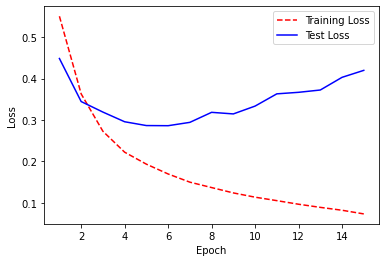

In [11]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)

# Set the number of features we want
number_of_features = 10000

# Load data and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
history = network.fit(features_train, # Features
                      target_train, # Target
                      epochs=15, # Number of epochs
                      verbose=0, # No output
                      batch_size=1000, # Number of observations per batch
                      validation_data=(features_test, target_test)) # Test data

# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

Alternatively, we can use the same approach to visualize the training and test accuracy over each epoch

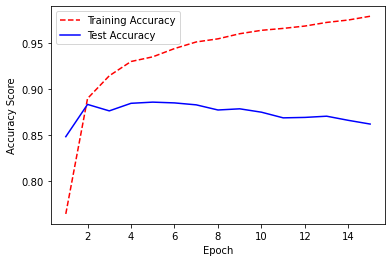

In [12]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

When our neural network is new, it will have a poor performance. As the neural network learns on the training data, the model’s error on both the training and test set will tend to decrease. However, at a certain point the neural network starts “memorizing” the training data, and overfits. When this starts happening, the training error will decrease while the test error will start increasing. Therefore, in many cases there is a “sweet spot” where the test error (which is the error we mainly care about) is at its lowest point. This effect can be plainly seen in the solution where we visualize the training and test loss at each epoch. Note that the test error is lowest around epoch five, after which the training loss continues to decrease while the test loss starts increasing. At this point onward, the model is overfitting.

## k-Fold Cross-Validating Neural Networks

In [13]:
# Load libraries
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)

# Number of features
number_of_features = 100

# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# Create function returning a compiled network
def create_network():

    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu", input_shape=(
        number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu"))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # Compile neural network
    network.compile(loss="binary_crossentropy", # Cross-entropy
                    optimizer="rmsprop", # Root Mean Square Propagation
                    metrics=["accuracy"]) # Accuracy performance metric

    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network,
                                 epochs=10,
                                 batch_size=100,
                                 verbose=0)

# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, features, target, cv=3)

array([0.91031796, 0.88448846, 0.87968796])

Theoretically, there is no reason we cannot use cross-validation to evaluate neural networks. However, neural networks are often used on very large data and can take hours or even days to train. For this reason, if the training time is long, adding the computational expense of k-fold cross-validation is unadvisable. For example, a model normally taking one day to train would take 10 days to evaluate using 10-fold cross-validation. If we have large data, it is often appropriate to simply evaluate the neural network on some test set.

If we have smaller data, k-fold cross-validation can be useful to maximize our ability to evaluate the neural network’s performance. This is possible in Keras because we can “wrap” any neural network such that it can use the evaluation features available in scikit-learn, including k-fold cross-validation. To accomplish this, we first have to create a function that returns a compiled neural network. Next we use KerasClassifier (if we have a classifier; if we have a regressor we can use KerasRegressor) to wrap the model so it can be used by scikit-learn. After this, we can use our neural network like any other scikit-learn learning algorithm (e.g., random forests, logistic regression). In our solution, we used cross_val_score to run a three-fold cross-validation on our neural network.

## CASE StUDY

In [14]:
import matplotlib
matplotlib.use("TkAgg")
from utils import preprocess
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(16)

try:
    df = pd.read_csv('diabetes.csv')
except:
    print("""
      Dataset not found in your computer.
      Please follow the instructions in the link below to download the dataset:
      https://raw.githubusercontent.com/PacktPublishing/Neural-Network-Projects-with-Python/master/chapter2/how_to_download_the_dataset.txt
      """)
    quit()

# Visualization of diabetes data

In [15]:
import matplotlib
matplotlib.use("TkAgg")
import pandas as pd
from matplotlib import pyplot as plt    
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('diabetes.csv')

# look at the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


import numpy as np
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

print("Number of rows with 0 values for each variable")
for col in df.columns:    
    missing_rows = df.loc[df[col]==0].shape[0]    
    print(col + ": " + str(missing_rows))

df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [16]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled
print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00           0.00           0.00     0.00  0.00   
std          1.00     1.00           1.00           1.00     1.00  1.00   
max          3.91     2.44           2.73           4.92     6.65  4.46   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


In [17]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [18]:
# !pip install keras

In [19]:
from keras.layers import Dense
from keras.models import Sequential
# Build neural network in Keras
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, verbose=False)

In [20]:
# Results - Accuracy
scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 92.83%

Testing Accuracy: 80.52%



Text(33.0, 0.5, 'Actual')

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000001B01041B430>
Exception in Tkinter callback
Traceba

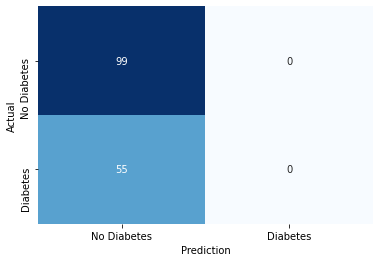

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Sequential

#y_test_pred = model.predict(X_test)
y_test_pred = (model.predict(X_test)).astype("int32")
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True,                  
                 xticklabels=['No Diabetes','Diabetes'],                
                 yticklabels=['No Diabetes','Diabetes'],                  
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

# ANN Regression

In [23]:
# Load the libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

The dataset describes 13 numerical properties of houses in Boston suburbs and is concerned with modeling the price of houses in those suburbs in thousands of dollars. As such, this is a regression predictive modeling problem. Input attributes include things like crime rate, proportion of nonretail business acres, chemical concentrations and more.

This is a well-studied problem in machine learning. It is convenient to work with because all of the input and output attributes are numerical and there are 506 instances to work with.

Reasonable performance for models evaluated using Mean Squared Error (MSE) are around 20 in squared thousands of dollars (or $4,500 if you take the square root). This is a nice target to aim for with our neural network model.

In [24]:
# load dataset
dataframe = pd.read_csv("housing.csv", delim_whitespace = True, header = None)
df = dataframe.values

# split into input (X) and output (Y) variables
X = df[:,0:13]
y = df[:,13]

In [25]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [26]:
# define wider model
def wider_model():
    # create model
    # `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
    model = Sequential()
    # Adds a layer instance on top of the layer stack. # Create a `Sequential` model and add a Dense layer as the first layer.
    model.add(Dense(20, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal'))
    
    # Compile model
    # The efficient ADAM optimization algorithm is used and a mean squared error loss function is optimized. 
    # This will be the same metric that we will use to evaluate the performance of the model.
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [27]:
# Evaluate Model Kfold Cross Validation
estimator = KerasRegressor(build_fn = baseline_model, epochs = 100, batch_size = 5, verbose = 0)
kfold = KFold(n_splits = 10)
results = cross_val_score(estimator, X, y, cv = kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -32.67 (23.74) MSE


In [28]:
# Evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = wider_model, epochs = 100, 
                                         batch_size = 5, verbose = 0)))
# The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
pipeline = Pipeline(estimators)
kfold = KFold(n_splits = 10)
results = cross_val_score(pipeline, X, y, cv = kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -21.48 (25.79) MSE


# Task
Apply ANN to Predict Average Daily Rates for Hotels. Data set (H1) is available on Moodle. Use the following features (independent) for ANN and target feature customer (ADR) from the given dataset.

#### Independent Features
* IsCanceled
* Country
* MarketSegment
* DepositType
* CustomerType
* RequiredCarParkingSpaces
* ArrivalDateWeekNumber

In [29]:
# Load the libraries
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Load the dataset named as 'H1.csv'
train_df = pd.read_csv('H1.csv')

# Displau the records
a = train_df.head()

# Store the training records into 'b' dataframe
b = train_df

# Sort the values of the dataframe (b)
b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending = True)

# Display the dataframe 
b

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,...,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,...,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,...,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,...,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14


## Reference
* Chapter 20, Machine Learning with Python Cookbook, Chris Albon, O'Reilly Media, Inc., 2018.
* <p>machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python</p>